#### 回溯算法

#### leetcode
51、37

* 回溯算法是一种重要的搜索算法，通过枚举搜索的方式，在一组可能的解中寻找满足期望的解
* 通过递归的方式，适用于解决广义的搜索问题。如深度优先搜索、图的着色、旅行商问题、数独、全排列等
* 时间复杂度 O(2^n)

##### 八皇后

有一个 8x8 的棋盘，希望往里放 8 个棋子（皇后），每个棋子所在的行、列、对角线都不能有另一个棋子

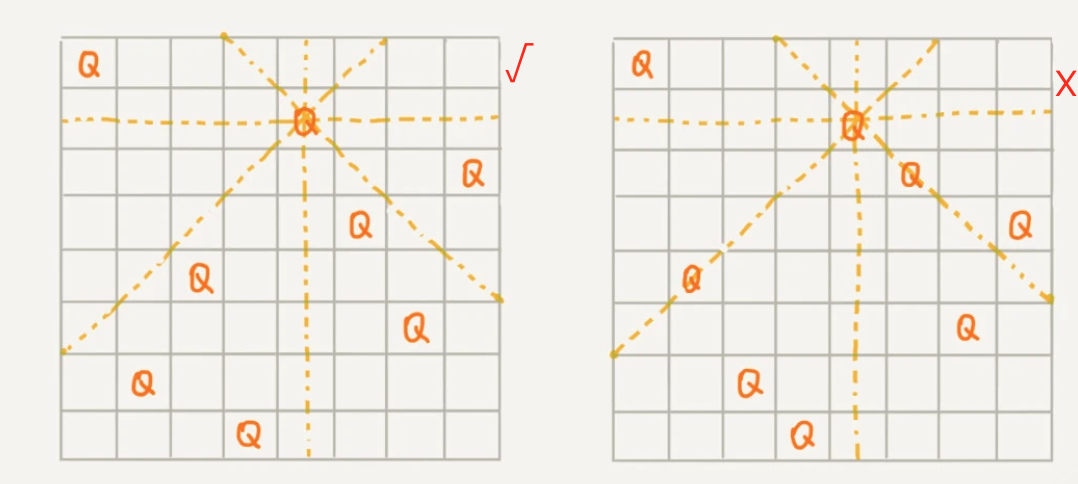


~~~
int[] result = new int[8];//全局或成员变量,下标表示行,值表示queen存储在哪一列
public void cal8queens(int row) { // 调用方式：cal8queens(0);
  if (row == 8) { // 8个棋子都放置好了，打印结果
    printQueens(result);
    return; // 8行棋子都放好了，已经没法再往下递归了，所以就return
  }
  for (int column = 0; column < 8; ++column) { // 每一行都有8中放法
    if (isOk(row, column)) { // 有些放法不满足要求
      result[row] = column; // 第row行的棋子放到了column列
      cal8queens(row+1); // 考察下一行
    }
  }
}

private boolean isOk(int row, int column) {//判断row行column列放置是否合适
  int leftup = column - 1, rightup = column + 1;
  for (int i = row-1; i >= 0; --i) { // 逐行往上考察每一行
    if (result[i] == column) return false; // 第i行的column列有棋子吗？
    if (leftup >= 0) { // 考察左上对角线：第i行leftup列有棋子吗？
      if (result[i] == leftup) return false;
    }
    if (rightup < 8) { // 考察右上对角线：第i行rightup列有棋子吗？
      if (result[i] == rightup) return false;
    }
    --leftup; ++rightup;
  }
  return true;
}

private void printQueens(int[] result) { // 打印出一个二维矩阵
  for (int row = 0; row < 8; ++row) {
    for (int column = 0; column < 8; ++column) {
      if (result[row] == column) System.out.print("Q ");
      else System.out.print("* ");
    }
    System.out.println();
  }
  System.out.println();
}

~~~

##### 0-1 背包

经典解法是动态规划，也可以用回溯算法，不过没那么高效

有一个背包，背包总的承载重量是 Wkg。现在我们有 n 个物品，每个物品的重量不等，并且不可分割。我们现在期望选择几件物品，装载到背包中。在不超过背包所能装载重量的前提下，如何让背包中物品的总重量最大？

* 和贪心的区别：贪心的物品可以分割，背包问题是要么装(1)要么不装(0)

对于每个物品来说，都有两种选择，装进背包或者不装进背包。对于 n 个物品来说，总的装法就有 2^n 种，去掉总重量超过 Wkg 的，从剩下的装法中选择总重量最接近 Wkg 的

这里就可以用回溯的方法。我们可以把物品依次排列，整个问题就分解为了 n 个阶段，每个阶段对应一个物品怎么选择。先对第一个物品进行处理，选择装进去或者不装进去，然后再递归地处理剩下的物品。描述起来很费劲，我们直接看代码，反而会更加清晰一些。


~~~

public int maxW = Integer.MIN_VALUE; //存储背包中物品总重量的最大值
// cw表示当前已经装进去的物品的重量和；i表示考察到哪个物品了；
// w背包重量；items表示每个物品的重量；n表示物品个数
// 假设背包可承受重量100，物品个数10，物品重量存储在数组a中，那可以这样调用函数：
// f(0, 0, a, 10, 100)
public void f(int i, int cw, int[] items, int n, int w) {
  if (cw == w || i == n) { // cw==w表示装满了;i==n表示已经考察完所有的物品
    if (cw > maxW) maxW = cw;
    return;
  }
  f(i+1, cw, items, n, w); // 不装第i个物品
  if (cw + items[i] <= w) {// 已经超过可以背包承受的重量的时候，就不要再装了
    f(i+1,cw + items[i], items, n, w);
  }
}

~~~

##### 正则表达式

正则表达式中，最重要的就是通配符，通配符结合在一起，可以表达非常丰富的语义。为了方便讲解，我假设正则表达式中只包含“*”和“?”这两种通配符，并且对这两个通配符的语义稍微做些改变，其中，“*”匹配任意多个（大于等于 0 个）任意字符，“?”匹配零个或者一个任意字符。基于以上背景假设，我们看下，如何用回溯算法，判断一个给定的文本，能否跟给定的正则表达式匹配？

~~~

public class Pattern {
  private boolean matched = false;
  private char[] pattern; // 正则表达式
  private int plen; // 正则表达式长度

  public Pattern(char[] pattern, int plen) {
    this.pattern = pattern;
    this.plen = plen;
  }

  public boolean match(char[] text, int tlen) { // 文本串及长度
    matched = false;
    rmatch(0, 0, text, tlen);
    return matched;
  }

  private void rmatch(int ti, int pj, char[] text, int tlen) {
    if (matched) return; // 如果已经匹配了，就不要继续递归了
    if (pj == plen) { // 正则表达式到结尾了
      if (ti == tlen) matched = true; // 文本串也到结尾了
      return;
    }
    if (pattern[pj] == '*') { // *匹配任意个字符
      for (int k = 0; k <= tlen-ti; ++k) {
        rmatch(ti+k, pj+1, text, tlen);
      }
    } else if (pattern[pj] == '?') { // ?匹配0个或者1个字符
      rmatch(ti, pj+1, text, tlen);
      rmatch(ti+1, pj+1, text, tlen);
    } else if (ti < tlen && pattern[pj] == text[ti]) { // 纯字符匹配才行
      rmatch(ti+1, pj+1, text, tlen);
    }
  }
}

~~~

In [ ]:
'''
22. Generate Parentheses Medium

Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.

 

Example 1:

Input: n = 3
Output: ["((()))","(()())","(())()","()(())","()()()"]
Example 2:

Input: n = 1
Output: ["()"]
 

Constraints:

1 <= n <= 8
'''

class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        self.list = []
        self._gen(n, 0, 0, "")
        return self.list

    # left: ( 已使用个数；right: ) 已使用格式
    def _gen(self, n, left, right, result):
        if left == n and right == n:
            self.list.append(result)
            return 
        if left < n:
            self._gen(n, left+1, right, result+"(")
        if left > right: # 当且仅当 ( 的使用个数 > ) 时，才可以继续添加 )，否则非法
            self._gen(n, left, right+1, result+")")